In [2]:
!pip install sastrawi

qCollecting sastrawi
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=b125a11a2e7a5f40f1ecb6fa60392c3c887ed22a592cf2b4c9a9d524732d0460
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


# Submision Analisis Sentimen APK Plaeystore Tokopedia

Dalam proyek ini, saya menganalisis ulasan pengguna Tokopedia di Google Play Store untuk memahami sentimen mereka secara mendalam. Dengan memanfaatkan teknik Natural Language Processing (NLP) seperti pembersihan teks, normalisasi kata slang ("gak" → "tidak"), dan stemming bahasa Indonesia ("diperbaiki" → "baik"), saya mengubah ulasan mentah menjadi data siap olah. Saya menguji model machine learning (Random Forest, SVM) dan deep learning (LSTM) untuk memprediksi sentimen (positif, netral, negatif), menggunakan TF-IDF dan word embedding sebagai fitur utama. Hasilnya tidak hanya mengungkap pola keluhan seperti masalah pengiriman atau bug aplikasi, tetapi juga memberikan rekomendasi berbasis data untuk peningkatan layanan. Melalui Python, NLTK, dan TensorFlow, proyek ini saya kembangkan sebagai upaya untuk menjembatani umpan balik pengguna dengan strategi pengembangan Tokopedia. Melalui proyek ini, saya mendapatkan wawasan mendalam tentang analisis sentimen dan keterampilan pemrograman yang relevan. Mari kita telusuri bagaimana sentimen pengguna Tokopedia dapat diungkap melalui ulasan mereka!

# **1. Import Library**

In [5]:
#Import Library Utama

# Data Processing & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing (Bahasa Indonesia)
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Machine Learning & NLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Word Embedding & Utilities

import requests
from io import StringIO
import csv

# Inisialisasi Sastrawi
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords_id = stop_factory.get_stop_words()

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


# **2. load data**

In [6]:
# 2. Load data
import pandas as pd
df = pd.read_csv("ulasan_tokopedia.csv")

In [7]:
ulasan_app_df = df.copy()

In [8]:
ulasan_app_df.head(3)

,reviewId,userName,content,score,thumbsUpCount,reviewDate,replyContent,replyDate,appVersion
0,c0b8645c-dcf7-44e8-bc61-0cb76fdc2b55,Pengguna Google,pengiriman lamban,1,0,2025-04-25 19:21:16,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:01,3.309.0
1,fac285e2-6a0a-4e11-9f19-3ba2d4ff5eb3,Pengguna Google,"banyak toko bermasalah, retur barangpun custom...",1,0,2025-04-25 19:17:25,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:02,3.305.0
2,84264004-23a4-41f2-83b3-d0b3283f0d5a,Pengguna Google,"cara belinya ternyata gampang, kukira susah",5,0,2025-04-25 18:32:16,Terima kasih sudah mempercayakan Tokopedia seb...,2025-04-25 19:07:01,3.309.0


# **3. data preparation**

In [9]:
# Hitung jumlah baris dan kolom
jumlah_ulasan, jumlah_kolom = ulasan_app_df.shape

# Tampilkan hasil
print("Total Ulasan:", jumlah_ulasan)
print("Total Kolom:", jumlah_kolom)

Total Ulasan: 40000
Total Kolom: 9


In [10]:
ulasan_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       40000 non-null  object
 1   userName       40000 non-null  object
 2   content        39999 non-null  object
 3   score          40000 non-null  int64 
 4   thumbsUpCount  40000 non-null  int64 
 5   reviewDate     40000 non-null  object
 6   replyContent   39996 non-null  object
 7   replyDate      39996 non-null  object
 8   appVersion     32468 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.7+ MB


In [11]:
ulasan_app_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewDate,replyContent,replyDate,appVersion
0,c0b8645c-dcf7-44e8-bc61-0cb76fdc2b55,Pengguna Google,pengiriman lamban,1,0,2025-04-25 19:21:16,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:01,3.309.0
1,fac285e2-6a0a-4e11-9f19-3ba2d4ff5eb3,Pengguna Google,"banyak toko bermasalah, retur barangpun custom...",1,0,2025-04-25 19:17:25,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:02,3.305.0
2,84264004-23a4-41f2-83b3-d0b3283f0d5a,Pengguna Google,"cara belinya ternyata gampang, kukira susah",5,0,2025-04-25 18:32:16,Terima kasih sudah mempercayakan Tokopedia seb...,2025-04-25 19:07:01,3.309.0
3,772b8e1f-2034-4500-981c-e381b5dbd818,Pengguna Google,update malah blank,3,0,2025-04-25 18:24:12,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2025-04-25 18:47:32,3.309.0
4,9c1c2072-3622-41b4-8fa2-878232ca7e22,Pengguna Google,udah pesan beberapa barang tp secara otomatis ...,1,0,2025-04-25 18:20:29,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 18:47:33,3.306.0


# **4. Data cleaning**


In [12]:
clean_df = ulasan_app_df.copy()

In [13]:
clean_df = clean_df.dropna(subset=['content'])
clean_df = clean_df.drop_duplicates(subset=['content'])

clean_df = clean_df.drop_duplicates()

In [14]:
clean_df.shape

(30645, 9)

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30645 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       30645 non-null  object
 1   userName       30645 non-null  object
 2   content        30645 non-null  object
 3   score          30645 non-null  int64 
 4   thumbsUpCount  30645 non-null  int64 
 5   reviewDate     30645 non-null  object
 6   replyContent   30641 non-null  object
 7   replyDate      30641 non-null  object
 8   appVersion     24164 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


In [16]:
def handle_negation(text):
    negation_words = ['tidak', 'bukan', 'tak', 'jangan']
    words = text.split()
    for i in range(len(words)-1):
        if words[i] in negation_words:
            words[i+1] = words[i] + "_" + words[i+1]
    return ' '.join(words)

# Fungsi untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)          # Hapus RT
    text = re.sub(r'http\S+', '', text)         # Hapus link
    text = re.sub(r'[0-9]+', '', text)          # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)         # Hapus tanda baca
    text = text.replace('\n', ' ')              # Ganti new line dengan spasi
    text = text.strip()                         # Hapus spasi di awal dan akhir

    text = handle_negation(text)  # <-- Tambah di sini
    text = stemmer.stem(text)


    return text

def casefoldingText(text):
    return text.lower()  # Mengubah semua karakter menjadi huruf kecil


def tokenizingText(text):
    return word_tokenize(text)  # Tokenisasi teks

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian')).union(set(stopwords.words('english')))
    additional_stopwords = {'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'}
    listStopwords.update(additional_stopwords)

    # Menghapus stopwords dari teks
    filtered = [word for word in text if word not in listStopwords]
    return filtered

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [17]:
slang_dict = {
    # Kata negasi
    "gak": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak", "g": "tidak", "gk": "tidak",
    "kagak": "tidak", "kgk": "tidak", "tdk": "tidak", "tak": "tidak", "enggak": "tidak",

    # Kata keterangan
    "kasian deh": "kasihan sekali", "kasian": "kasihan", "klo": "kalau", "kl": "kalau", "kalo": "kalau",
    "cuma": "hanya", "cuman": "hanya", "doang": "saja", "aja": "saja", "banget": "sekali", "bgt": "sekali",
    "udah": "sudah", "udh": "sudah", "sdh": "sudah", "dah": "sudah",

    # Singkatan umum
    "yg": "yang", "dgn": "dengan", "dg": "dengan", "utk": "untuk", "u/": "untuk", "bbrp": "beberapa",
    "yah": "ya", "y": "ya", "trs": "terus", "trus": "terus", "krn": "karena", "karna": "karena", "tp": "tetapi",
    "tapi": "tetapi", "pd": "pada", "dr": "dari", "jd": "jadi", "jgn": "jangan", "skrg": "sekarang",
    "skg": "sekarang", "bs": "bisa", "bsa": "bisa", "blm": "belum", "kpn": "kapan", "msh": "masih", "n" : "dan",

    # Kata ganti
    "sy": "saya", "aq": "saya", "gw": "saya", "gue": "saya", "gua": "saya", "w": "saya", "ak": "saya",
    "aku": "saya", "q": "saya", "lu": "kamu", "lo": "kamu", "u": "kamu", "km": "kamu", "kmu": "kamu",

    # Toko online
    "tokped": "tokopedia", "shopee": "shopee", "lazada": "lazada", "bukalapak": "bukalapak",

    # Kata khusus toko online
    "seller": "penjual", "buyer": "pembeli", "order": "pesanan", "customer": "pelanggan",
    "cod": "bayar di tempat", "free ongkir": "gratis ongkos kirim", "ongkir": "ongkos kirim",
    "review": "ulasan", "trusted": "terpercaya", "refund": "pengembalian dana", "return": "pengembalian barang",
    "rating": "penilaian", "reject": "tolak", "cs": "layanan pelanggan",

    # Kata kesalahan umum
    "brubah": "berubah", "rubah": "ubah", "goood": "bagus", "good": "bagus", "bgs": "bagus", "nice": "bagus",
    "mantap": "bagus", "mantab": "bagus", "mantul": "bagus", "mntap": "bagus", "mantep": "bagus",
    "auto": "otomatis", "proses": "proses", "cancel": "batal", "ny": "nya", "online": "daring",
    "chat": "pesan", "transaksi": "transaksi", "eror": "error", "care": "peduli",

          # Lainnya
    "nya": "nya", "nyaa": "nya", "lg": "lagi", "lgi": "lagi", "smoga": "semoga", "byk": "banyak",
    "bnyk": "banyak", "jg": "juga", "jga": "juga", "emg": "memang", "emang": "memang",
    "malah": "justru", "promo": "promosi", "ok": "oke", "pake": "pakai", "ya": "iya",
    "pas": "tepat sekali", "sampe": "sampai", "bikin": "membuat", "fitur": "fitur",
    "parah": "buruk", "dapet": "dapat", "kena": "terkena", "no": "nomor", "bkn": "bukan",
    "apk": "aplikasi", "mna": "mana", "bru": "baru", "ngirim": "mengirim", "niat": "berniat",
    "liat": "lihat", "jln": "jalan", "rame": "ramai", "lmyan": "lumayan", "gmn": "bagaimana",
    "guna": "berguna", "alami": "mengalami", "kebodohan": "kebodohan", "bodoh": "bodoh",
    "akhir": "akhirnya", "alias": "alias", "padahal": "padahal", "sempat": "kesempatan",
    "komunikasi": "komunikasi", "masuk": "masuk", "peduli": "peduli" , "tokped" : "tokopedie", "toped" : 'tokopedia',
     "pesen" : "pesan", "via" : 'dari',"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada",
    "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know",
    "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo",
    "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku",
    "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis",
    "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget",
    "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci",
    "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
    "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu",
    "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki",
    "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat",
    "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal",
    "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih",
    "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek",
    "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan",
    "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
    "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu",
    "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang",
    "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak",
    "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas",
    "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas",
    "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini",
    "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok",
    "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong",
    "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut",
    "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing",
    "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau",
    "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar",
    "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa",
    "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu",
    "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman",
    "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi",
    "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat",
    "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir",
    "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih",
    "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam",
    "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi",
    "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk",
    "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti",
    "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
    "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta",
    "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip",
    "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara",
    "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slang_dict:  # Gunakan slang_dict yang sudah ada
            fixed_words.append(slang_dict[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text



In [18]:
def preprocess_text(text):
    # 1. Pembersihan dasar
    text = cleaningText(text)
    # 2. Case folding
    text = casefoldingText(text)
    # 4. Tokenisasi
    tokens = tokenizingText(text)
    # 5. Filter stopwords
    filtered_tokens = filteringText(tokens)
    # 6. Gabungkan kembali menjadi kalimat
    return toSentence(filtered_tokens)


In [19]:
 # Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

# **5. Pelabelan**

In [20]:
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewDate,replyContent,replyDate,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,c0b8645c-dcf7-44e8-bc61-0cb76fdc2b55,Pengguna Google,pengiriman lamban,1,0,2025-04-25 19:21:16,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:01,3.309.0,kirim lamban,kirim lamban,kirim lamban,"[kirim, lamban]","[kirim, lamban]",kirim lamban
1,fac285e2-6a0a-4e11-9f19-3ba2d4ff5eb3,Pengguna Google,"banyak toko bermasalah, retur barangpun custom...",1,0,2025-04-25 19:17:25,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:02,3.305.0,banyak toko masalah retur barang customer rugi...,banyak toko masalah retur barang customer rugi...,banyak toko masalah retur barang pelanggan rug...,"[banyak, toko, masalah, retur, barang, pelangg...","[toko, retur, barang, pelanggan, rugi, saldo, ...",toko retur barang pelanggan rugi saldo ongkos ...
2,84264004-23a4-41f2-83b3-d0b3283f0d5a,Pengguna Google,"cara belinya ternyata gampang, kukira susah",5,0,2025-04-25 18:32:16,Terima kasih sudah mempercayakan Tokopedia seb...,2025-04-25 19:07:01,3.309.0,cara beli nyata gampang kira susah,cara beli nyata gampang kira susah,cara beli nyata gampang kira susah,"[cara, beli, nyata, gampang, kira, susah]","[beli, nyata, gampang, susah]",beli nyata gampang susah
3,772b8e1f-2034-4500-981c-e381b5dbd818,Pengguna Google,update malah blank,3,0,2025-04-25 18:24:12,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2025-04-25 18:47:32,3.309.0,update malah blank,update malah blank,update bahkan blank,"[update, bahkan, blank]","[update, blank]",update blank
4,9c1c2072-3622-41b4-8fa2-878232ca7e22,Pengguna Google,udah pesan beberapa barang tp secara otomatis ...,1,0,2025-04-25 18:20:29,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 18:47:33,3.306.0,udah pesan beberapa barang tp cara otomatis di...,udah pesan beberapa barang tp cara otomatis di...,sudah pesan beberapa barang tapi cara otomatis...,"[sudah, pesan, beberapa, barang, tapi, cara, o...","[pesan, barang, otomatis, btal, penjualdn, uan...",pesan barang otomatis btal penjualdn uang masu...


In [21]:
import requests
from io import StringIO

def load_lexicon(url):

    response = requests.get(url)
    lexicon = {}

    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            if len(row) >= 2:  # Pastikan ada minimal 2 kolom
                lexicon[row[0]] = int(row[1])
    else:
        print(f"Gagal mengambil data dari {url}")

    return lexicon

# PELABELAN SENTIMEN BERDASARKAN RATING
def label_sentiment_based_on_rating(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:  # 4 atau 5
        return 'positif'

# Terapkan ke dataframe
clean_df['sentimen_rating'] = clean_df['score'].apply(label_sentiment_based_on_rating)


# LOAD DATA LEXICON

lexicon_positive = load_lexicon('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
lexicon_negative = load_lexicon('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')


# ANALISIS POLARITY BERDASARKAN LEXICON

def sentiment_analysis_lexicon_indonesia(text):
    """Menghitung polarity score berdasarkan lexicon"""
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Konversi score ke label sentimen
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
      polarity = "netral"

    return score, polarity

# Terapkan ke dataframe
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
clean_df['polarity_score'] = results.apply(lambda x: x[0])
clean_df['sentimen_lexicon'] = results.apply(lambda x: x[1])


# ENCODING UNTUK KEDUA JENIS LABEL

le_rating = LabelEncoder()
clean_df['label_rating'] = le_rating.fit_transform(clean_df['sentimen_rating'])

# Untuk label berdasarkan lexicon
le_lexicon = LabelEncoder()
clean_df['label_lexicon'] = le_lexicon.fit_transform(clean_df['sentimen_lexicon'])

# Tampilkan perbandingan
print("Distribusi Label Berdasarkan Rating:")
print(clean_df['sentimen_rating'].value_counts())

print("\nDistribusi Label Berdasarkan Lexicon:")
print(clean_df['sentimen_lexicon'].value_counts())


Distribusi Label Berdasarkan Rating:
sentimen_rating
negatif    14836
positif    13997
netral      1812
Name: count, dtype: int64

Distribusi Label Berdasarkan Lexicon:
sentimen_lexicon
negatif    13772
positif    11936
netral      4937
Name: count, dtype: int64


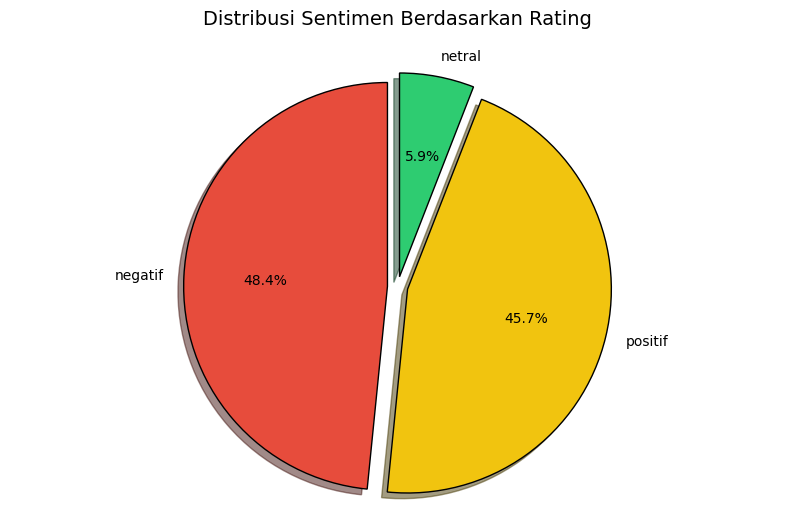

In [22]:

#VISUALISASI DISTRIBUSI SENTIMEN (BERDASARKAN RATING)
sentimen_counts = clean_df['sentimen_rating'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#E74C3C', '#F1C40F', '#2ECC71']
labels = sentimen_counts.index

plt.pie(
    sentimen_counts.values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05),
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Distribusi Sentimen Berdasarkan Rating', fontsize=14, pad=20)
plt.axis('equal')



plt.show()

# **7. EDA**

In [23]:
# Eksplorasi Visualisasi Data

print("="*60)
print("EKSPLORASI DATA HASIL SCRAPING")
print("="*60)

print("\nDistribusi Kelas Sentimen:")
sentiment_counts = clean_df['label_lexicon'].value_counts()
print(sentiment_counts)
print(f"Persentase: {sentiment_counts / len(clean_df) * 100}")

EKSPLORASI DATA HASIL SCRAPING

Distribusi Kelas Sentimen:
label_lexicon
0    13772
2    11936
1     4937
Name: count, dtype: int64
Persentase: label_lexicon
0    44.940447
2    38.949258
1    16.110295
Name: count, dtype: float64


In [24]:
clean_df.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewDate,replyContent,replyDate,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentimen_rating,polarity_score,sentimen_lexicon,label_rating,label_lexicon
0,c0b8645c-dcf7-44e8-bc61-0cb76fdc2b55,Pengguna Google,pengiriman lamban,1,0,2025-04-25 19:21:16,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:01,3.309.0,kirim lamban,kirim lamban,kirim lamban,"[kirim, lamban]","[kirim, lamban]",kirim lamban,negatif,2,positif,0,2
1,fac285e2-6a0a-4e11-9f19-3ba2d4ff5eb3,Pengguna Google,"banyak toko bermasalah, retur barangpun custom...",1,0,2025-04-25 19:17:25,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-25 19:47:02,3.305.0,banyak toko masalah retur barang customer rugi...,banyak toko masalah retur barang customer rugi...,banyak toko masalah retur barang pelanggan rug...,"[banyak, toko, masalah, retur, barang, pelangg...","[toko, retur, barang, pelanggan, rugi, saldo, ...",toko retur barang pelanggan rugi saldo ongkos ...,negatif,-4,negatif,0,0


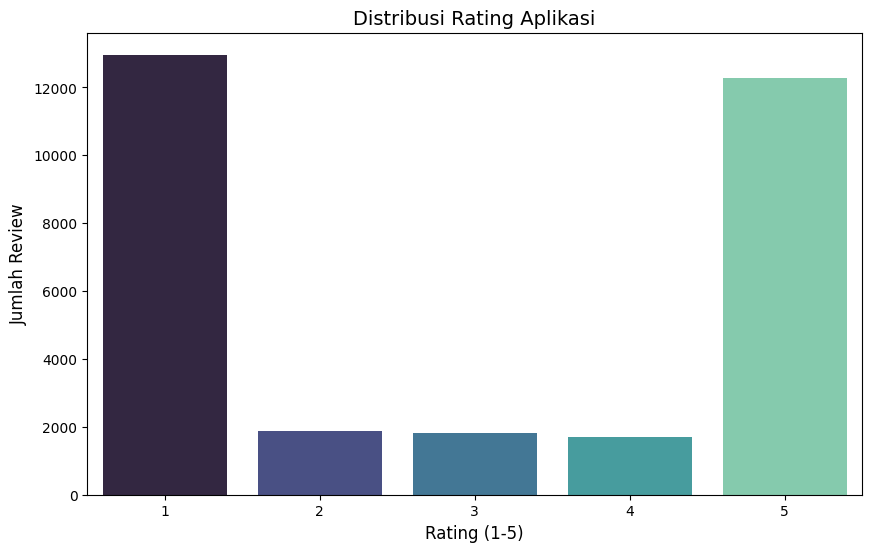

In [25]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=clean_df, palette='mako')
plt.title('Distribusi Rating Aplikasi', fontsize=14)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.xticks(fontsize=10)
plt.show()


# **8.data Spliting**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load data
X = clean_df['text_akhir']
y = clean_df['sentimen_lexicon']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=5,
    max_df=0.7,
    ngram_range=(1,2),
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# **9. data prosesing model**

## 9.1.Meachine learning

#### a. Model Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan (menggunakan X_train_tfidf)
random_forest.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data pelatihan dan data uji (menggunakan X_train_tfidf dan X_test_tfidf)
y_pred_train_rf = random_forest.predict(X_train_tfidf)
y_pred_test_rf = random_forest.predict(X_test_tfidf)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9856012400065264
Random Forest - accuracy_test: 0.8554413444281286


#### b. Model Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ekstraksi fitur dengan TF-IDF hanya pada data training
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform on training data only

# Transform testing data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train_tfidf, y_train) # Use the transformed training data

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train_tfidf) # Use the transformed training data
y_pred_test_dt = decision_tree.predict(X_test_tfidf) # Use the transformed testing data


# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.991801272638277
Decision Tree - accuracy_test: 0.8095937347038669


#### c. Model lainya

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_train_nb = nb_model.predict(X_train_tfidf)
y_pred_test_nb = nb_model.predict(X_test_tfidf)
print(f'Naive Bayes - akurasi_train: {accuracy_score(y_train, y_pred_train_nb):.4f}')
print(f'Naive Bayes - akurasi_test: {accuracy_score(y_test, y_pred_test_nb):.4f}')

# Support Vector Machine
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_train_svm = svm_model.predict(X_train_tfidf)
y_pred_test_svm = svm_model.predict(X_test_tfidf)
print(f'SVM - akurasi_train: {accuracy_score(y_train, y_pred_train_svm):.4f}')
print(f'SVM - akurasi_test: {accuracy_score(y_test, y_pred_test_svm):.4f}')

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)
y_pred_train_lr = lr_model.predict(X_train_tfidf)
y_pred_test_lr = lr_model.predict(X_test_tfidf)
print(f'Logistic Regression - akurasi_train: {accuracy_score(y_train, y_pred_train_lr):.4f}')
print(f'Logistic Regression - akurasi_test: {accuracy_score(y_test, y_pred_test_lr):.4f}')

Naive Bayes - akurasi_train: 0.7595
Naive Bayes - akurasi_test: 0.7393
SVM - akurasi_train: 0.9349
SVM - akurasi_test: 0.9161
Logistic Regression - akurasi_train: 0.9246
Logistic Regression - akurasi_test: 0.9057


## 9.2.Deep learning

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Assuming clean_df is already defined and preprocessed

# Assuming X and y are already defined as text data and labels
X = clean_df['text_akhir']  # Text data
y = clean_df['sentimen_lexicon']  # Sentiment labels (as strings)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(clean_df['text_akhir'])

X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X_pad = pad_sequences(X_seq, maxlen=200)

# Split 70/30
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Label Encoding: Convert y_train_lstm and y_test_lstm to numerical representation
# Assuming y_train_lstm and y_test_lstm are Pandas Series
# First convert the Series to NumPy arrays
y_train_lstm = y_train_lstm.to_numpy()
y_test_lstm = y_test_lstm.to_numpy()

# Check if the target is not already numeric. If not then perform label encoding
label_encoder = LabelEncoder()

# This assumes y_train_lstm and y_test_lstm contain your labels like "positif", "negatif", "netral"
if not np.issubdtype(y_train_lstm.dtype, np.number):
    y_train_lstm = label_encoder.fit_transform(y_train_lstm)  # Fit the encoder on training data
    y_test_lstm = label_encoder.transform(y_test_lstm)  # Transform testing data using the same encoder


# Model LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 128, input_length=200))
model_lstm.add(LSTM(128, dropout=0.2))
model_lstm.add(Dense(3, activation='softmax')) # Output layer with 3 units (for 3 sentiment classes)

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train_lstm, validation_data=(X_test_lstm, y_test_lstm), epochs=5, batch_size=64)

Epoch 1/5
336/336 ━━━━━━━━━━━━━━━━━━━━ 169s 491ms/step - accuracy: 0.7074 - loss: 0.6941 - val_accuracy: 0.9050 - val_loss: 0.2727
Epoch 2/5
336/336 ━━━━━━━━━━━━━━━━━━━━ 186s 553ms/step - accuracy: 0.9257 - loss: 0.2150 - val_accuracy: 0.9145 - val_loss: 0.2384
Epoch 3/5
336/336 ━━━━━━━━━━━━━━━━━━━━ 164s 489ms/step - accuracy: 0.9457 - loss: 0.1518 - val_accuracy: 0.9205 - val_loss: 0.2382
Epoch 4/5
336/336 ━━━━━━━━━━━━━━━━━━━━ 165s 490ms/step - accuracy: 0.9625 - loss: 0.1128 - val_accuracy: 0.9235 - val_loss: 0.2354
Epoch 5/5
336/336 ━━━━━━━━━━━━━━━━━━━━ 201s 487ms/step - accuracy: 0.9682 - loss: 0.0916 - val_accuracy: 0.9209 - val_loss: 0.2659


In [31]:
y = clean_df['sentimen_lexicon']

# Encode label ke numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# TRAINING MODEL (DENGAN LABEL ENCODING)

from sklearn.svm import LinearSVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    clean_df['text_akhir'],
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=5,
    max_df=0.7,
    ngram_range=(1,2),
    sublinear_tf=True
)

# Transform data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training model
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)
def predict_sentiment(text):
    try:
        # Preprocess text
        processed_text = preprocess_text(text)

        # TF-IDF transform
        text_tfidf = tfidf.transform([processed_text])

        # Prediksi
        numeric_pred = svm_model.predict(text_tfidf)[0]

        # Decode ke label original
        sentiment = le.inverse_transform([numeric_pred])[0]

        return sentiment, processed_text

    except Exception as e:
        print(f"Error dalam prediksi: {str(e)}")
        return "netral", None  # Return a default sentiment instead of None


def manual_input_system():
    print("\n" + "="*50)
    print("ANALISIS SENTIMEN TOKOPEDIA")
    print("="*50)

    while True:
        user_input = input("Masukkan ulasan (atau 'q' untuk keluar): ")

        if user_input.lower() == 'q':
            print("analisis selesai!")
            break

        sentiment, processed = predict_sentiment(user_input)

        print("Hasil Analisis:")
        print(f"masukan: {user_input}")
        # Check if sentiment is not None before calling upper()
        print(f"Sentimen: {sentiment.upper() if sentiment is not None else 'NETRAL'}")
        print("─"*50)


def verify_system():
    print(f"Kelas Sentimen: {le.classes_.tolist()}")

# Jalankan verifikasi
verify_system()

# Jalankan sistem input manual
manual_input_system()

Kelas Sentimen: ['negatif', 'netral', 'positif']

ANALISIS SENTIMEN TOKOPEDIA
Masukkan ulasan (atau 'q' untuk keluar): Aplikasi sangat user friendly, proses belanja jadi lebih cepat dan mudah!
Hasil Analisis:
masukan: Aplikasi sangat user friendly, proses belanja jadi lebih cepat dan mudah!
Sentimen: POSITIF
──────────────────────────────────────────────────
Masukkan ulasan (atau 'q' untuk keluar): Pengiriman super cepat, barang sampai sebelum estimasi. Seller ramah-ramah
Hasil Analisis:
masukan: Pengiriman super cepat, barang sampai sebelum estimasi. Seller ramah-ramah
Sentimen: POSITIF
──────────────────────────────────────────────────
Masukkan ulasan (atau 'q' untuk keluar): Aplikasi sering error pas checkout, bikin frustrasi!
Hasil Analisis:
masukan: Aplikasi sering error pas checkout, bikin frustrasi!
Sentimen: NEGATIF
──────────────────────────────────────────────────
Masukkan ulasan (atau 'q' untuk keluar): Barang tidak sesuai deskripsi, seller sulit dihubungi
Hasil Analisis:
ma